In [203]:
import numpy as np
import mip as mp
import matplotlib.pyplot as plt

In [204]:
m = mp.Model()

E = m.add_var(name='Estudar', var_type=mp.CONTINUOUS, lb=0)
D = m.add_var(name='Divertir', var_type=mp.CONTINUOUS, lb=0)

m.objective = mp.maximize(E + 2 * D)

m += E + D <= 10
m += E >= D
m += D <= 4

m.optimize()

Starting solution of the Linear programming problem using Primal Simplex



<OptimizationStatus.OPTIMAL: 0>

Coin0506I Presolve 0 (-3) rows, 0 (-2) columns and 0 (-5) elements
Clp0000I Optimal - objective value 14
Coin0511I After Postsolve, objective 14, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 14 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00


In [205]:
print(f"Tempo estudando: {E.x:.4f}")
print(f"Tempo se divertindo: {D.x:.4f}")
print(f"Max return: {m.objective_value}")

Tempo estudando: 6.0000
Tempo se divertindo: 4.0000
Max return: 14.0


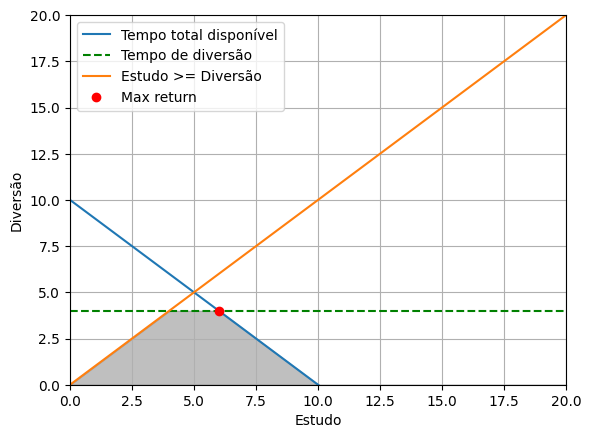

In [206]:
x = np.linspace(0, 20, 200)

r1 = 10 - x
plt.plot(x, r1, label="Tempo total disponível")

r2 = 4
plt.axhline(y=r2, color='g', linestyle='--', label="Tempo de diversão")

r3 = x
plt.plot(x, r3, label="Estudo >= Diversão")

plt.xlim(0, 20)
plt.ylim(0, 20)

plt.xlabel("Estudo")
plt.ylabel("Diversão")
plt.plot(E.x, D.x, 'ro', label="Max return")
plt.fill_between(x, np.minimum(np.minimum(r1, r2), r3), color='gray', alpha=0.5)

plt.grid()
plt.legend()
plt.show()